In [2]:
import pickle
import json
import requests
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
np.random.seed(4)

# these are from the keras guide
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [13]:
"""dfs_dict = pickle.load(open("../data/timeline-di.p", "rb"))

gameids = list(dfs_dict.keys())
np.random.shuffle(gameids)

idcount = len(gameids)
splits = [int(idcount*i) for i in [0,.8,.9,1]]
np.random.shuffle(gameids)
train_ids = gameids[splits[0]:splits[1]]"""

In [14]:
def plot_base_map(title_str=""):
    """plots league of legends map with the passed title
    returns None"""
    plt.xlim(0,15000)
    plt.ylim(0,15000)
    img = plt.imread("../data/map.png")
    plt.imshow(img, extent=[0,15000,0,15000],)
    plt.title(title_str)
    return None

In [64]:
def plot_dist_metric(origin_pos):
    for x_i in range(0,15001,1000):
        for y_i in range(0,15001,1000):
            dist = ((origin_pos[0]-x_i)**2 + (origin_pos[1]-y_i)**2)**.5
            plt.scatter([x_i],
                        [y_i],
                        color=(.8,.3,.3),
                        s=(dist**2)/250000
                       )
    plot_base_map()
    return None
    

In [77]:
def plot_log_dist_metric(origin_pos, scalar=1):
    for x_i in range(0,15001,1000):
        for y_i in range(0,15001,1000):
            dist = ((origin_pos[0]-x_i)**2 + (origin_pos[1]-y_i)**2)**.5
            log_dist = np.log(1 + dist)
            plt.scatter([x_i], [y_i], color=(.8,.3,.3), s=(log_dist)**2)
    plot_base_map()
    return None

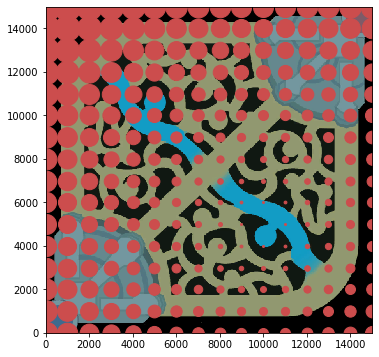

In [68]:
plot_dist_metric((10001,5000))

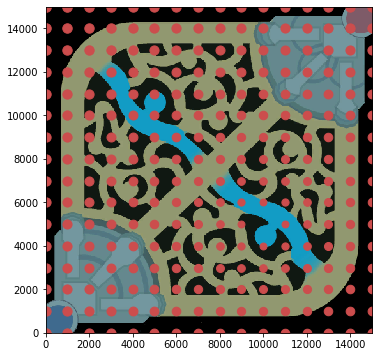

In [78]:
plot_log_dist_metric((10000,5000))

In [126]:
x=range(1,20000)

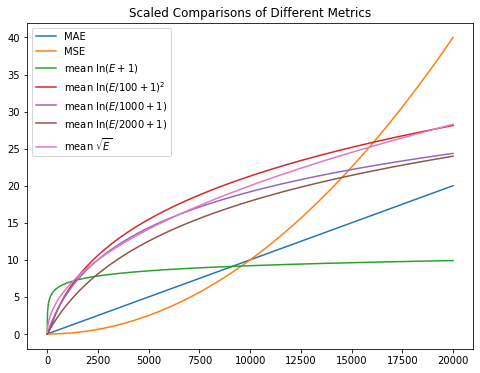

In [162]:
plt.plot(x,[i/1000 for i in x], label="MAE")
plt.plot(x,[i**2/10000000 for i in x], label="MSE")
plt.plot(x, np.log(x), label="mean $\ln(E+1)$")
plt.plot(x, [np.log(i/100+1)**2 for i in x], label="mean $\ln(E/100+1)^2$")
plt.plot(x, [8*np.log((i+1000)/1000) for i in x], label="""mean $\ln(E/1000+1)$""")
plt.plot(x, [10*np.log((i+2000)/2000) for i in x], label="""mean $\ln(E/2000+1)$""")
plt.plot(x, [.2*i**.5 for i in x], label="""mean $\sqrt{E}$""")
#plt.plot(x,.02*np.log([i*10 for i in x])**3, color=(1,0,0), label="logdist squared")
plt.title("Scaled Comparisons of Different Metrics")
plt.legend()

In [ ]:
dy/dx = 2 log(x+1000) 1/(x+1000)



1.5*log(4001) = log(8001)

log(x)=y
e^y = x